In [9]:
# Creating a model
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.list_physical_devices(device_type=None)

from keras.models import Sequential
from keras.layers import Dense

# Custom activation function
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers

from sklearn.metrics import confusion_matrix
import seaborn as sns


import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import layers

from keras import backend as K

In [3]:
def custom_activation(x):
    return tf.where(x<0, tf.multiply(x,0), tf.where(x<2.4, tf.multiply(0.6,x),tf.where(x<6.9,tf.add(tf.multiply(0.21,x),0.95),tf.add(tf.multiply(0.5,x),-1.05))))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

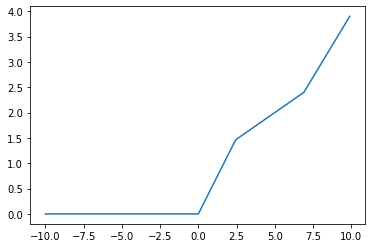

In [4]:
list1=[]
for i in np.arange(-10,10,0.1):
    a=tf.constant([i])
    b=custom_activation(a)
    list1.append(b)
    
plt.plot(np.arange(-10,10,0.1),list1)

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
train_data = np.expand_dims(x_train, -1)
test_data = np.expand_dims(x_test, -1)


# convert class vectors to binary class matrices
train_label = to_categorical(y_train, num_classes)
test_label = to_categorical(y_test, num_classes)

In [6]:
epoch_fix=30

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)         0

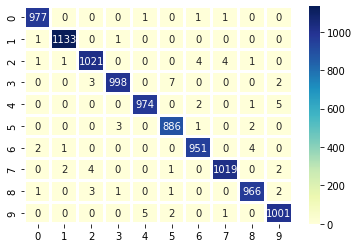

In [7]:
#MNIST relu

input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_MNIST_Relu=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs,validation_data=(test_data, test_label),verbose=0)



test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

K.clear_session()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)        0         
2D)                                                              
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling  (None, 3, 3, 256)        

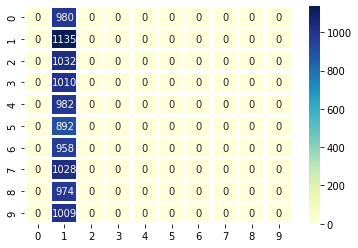

In [10]:
#MNIST Sigmoid

input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation='sigmoid'),
        layers.Dense(1000,activation='sigmoid'),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_MNIST_Sigmoid=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)



test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)         0

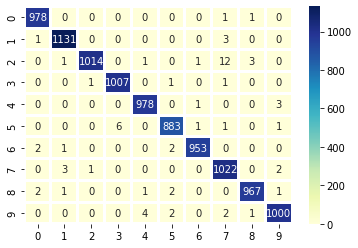

In [11]:
#MNIST Bistable
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation=custom_activation),
        layers.Dense(1000,activation=custom_activation),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_MNIST_Bistable=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs,validation_data=(test_data, test_label),verbose=0)


test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)         0

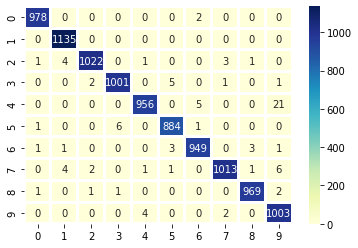

In [12]:
#MNIST no activation
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096),
        layers.Dense(1000),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_MNIST_No=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)

test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu")

K.clear_session()

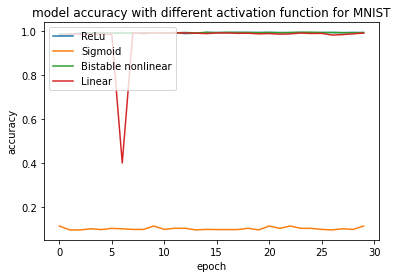

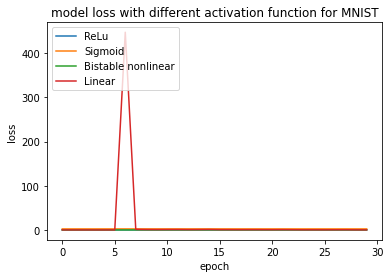

0.9926000237464905 0.061018165200948715
0.11349999904632568 2.3179612159729004
0.9933000206947327 0.03614262863993645
0.9909999966621399 0.1652534008026123


In [13]:
#Plot accuracy vs epochs 
plt.plot(history_MNIST_Relu.history['val_accuracy'])
plt.plot(history_MNIST_Sigmoid.history['val_accuracy'])
plt.plot(history_MNIST_Bistable.history['val_accuracy'])
plt.plot(history_MNIST_No.history['val_accuracy'])
plt.title('model accuracy with different activation function for MNIST')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper left')
plt.show()


plt.plot(history_MNIST_Relu.history['val_loss'])
plt.plot(history_MNIST_Sigmoid.history['val_loss'])
plt.plot(history_MNIST_Bistable.history['val_loss'])
plt.plot(history_MNIST_No.history['val_loss'])
plt.title('model loss with different activation function for MNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper left')
plt.show()

print(history_MNIST_Relu.history['val_accuracy'][29],history_MNIST_Relu.history['val_loss'][29])
print(history_MNIST_Sigmoid.history['val_accuracy'][29],history_MNIST_Sigmoid.history['val_loss'][29])
print(history_MNIST_Bistable.history['val_accuracy'][29],history_MNIST_Bistable.history['val_loss'][29])
print(history_MNIST_No.history['val_accuracy'][29],history_MNIST_No.history['val_loss'][29])

In [14]:
#Load FashionMNIST

(train_data, train_label), (test_data, test_label) = tf.keras.datasets.fashion_mnist.load_data()

train_label=to_categorical(train_label)
test_label=to_categorical(test_label)

label=["T-Shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
train_data=train_data/255
test_data=test_data/255

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)         0

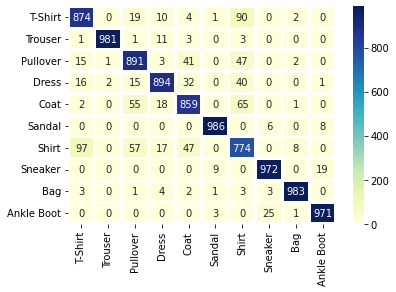

In [15]:
#Fashion MNIST relu
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FashionMNIST_Relu=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)

test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)         0

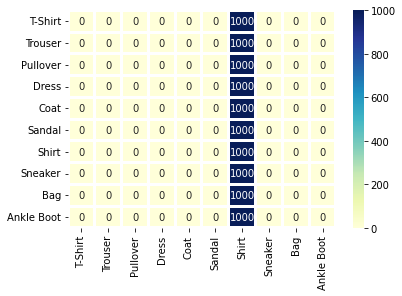

In [16]:
#Fashion MNIST Sigmoid
input_shape=(28,28)
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation='sigmoid'),
        layers.Dense(1000,activation='sigmoid'),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FashionMNIST_Sigmoid=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)

test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)         0

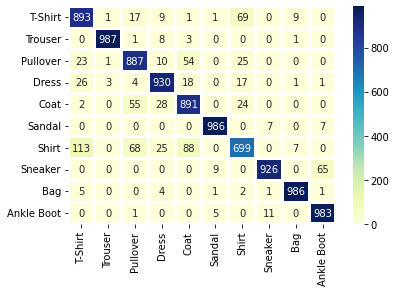

In [17]:
#Fashion MNIST Bistable

input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation=custom_activation),
        layers.Dense(1000,activation=custom_activation),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FashionMNIST_Bistable=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)


test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 14, 14, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)         0

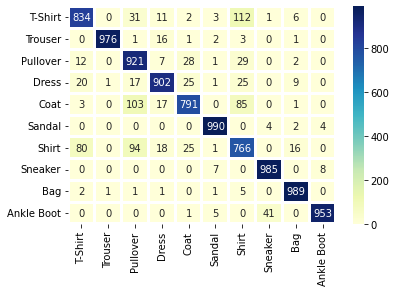

In [18]:
#Fashion MNIST no activation
input_shape=(28,28,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096),
        layers.Dense(1000),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_FashionMNIST_No=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label),verbose=0)


test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

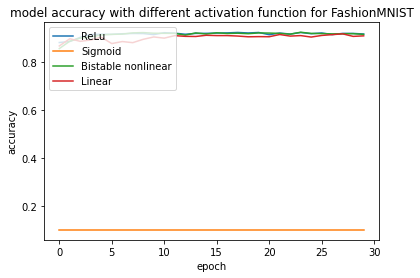

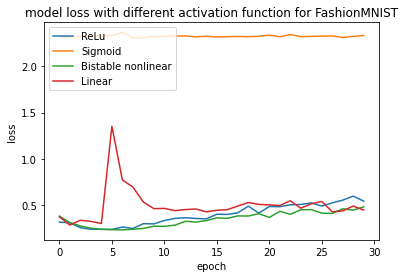

0.9185000061988831 0.5429877042770386
0.10000000149011612 2.3344039916992188
0.9168000221252441 0.48149195313453674
0.9107000231742859 0.4460289478302002


In [21]:
#Plot accuracy vs epochs 
plt.plot(history_FashionMNIST_Relu.history['val_accuracy'])
plt.plot(history_FashionMNIST_Sigmoid.history['val_accuracy'])
plt.plot(history_FashionMNIST_Bistable.history['val_accuracy'])
plt.plot(history_FashionMNIST_No.history['val_accuracy'])
plt.title('model accuracy with different activation function for FashionMNIST')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper left')
plt.show()


plt.plot(history_FashionMNIST_Relu.history['val_loss'])
plt.plot(history_FashionMNIST_Sigmoid.history['val_loss'])
plt.plot(history_FashionMNIST_Bistable.history['val_loss'])
plt.plot(history_FashionMNIST_No.history['val_loss'])
plt.title('model loss with different activation function for FashionMNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper left')
plt.show()

print(history_FashionMNIST_Relu.history['val_accuracy'][29],history_FashionMNIST_Relu.history['val_loss'][29])
print(history_FashionMNIST_Sigmoid.history['val_accuracy'][29],history_FashionMNIST_Sigmoid.history['val_loss'][29])
print(history_FashionMNIST_Bistable.history['val_accuracy'][29],history_FashionMNIST_Bistable.history['val_loss'][29])
print(history_FashionMNIST_No.history['val_accuracy'][29],history_FashionMNIST_No.history['val_loss'][29])

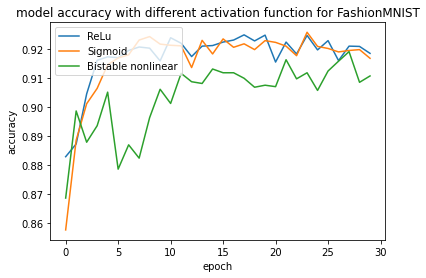

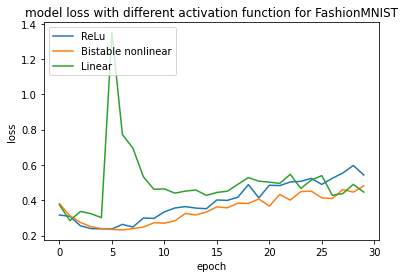

0.9185000061988831 0.5429877042770386
0.10000000149011612 2.3344039916992188
0.9168000221252441 0.48149195313453674
0.9107000231742859 0.4460289478302002


In [22]:
#Plot accuracy vs epochs 
plt.plot(history_FashionMNIST_Relu.history['val_accuracy'])
#plt.plot(history_FashionMNIST_Sigmoid.history['val_accuracy'])
plt.plot(history_FashionMNIST_Bistable.history['val_accuracy'])
plt.plot(history_FashionMNIST_No.history['val_accuracy'])
plt.title('model accuracy with different activation function for FashionMNIST')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper left')
plt.show()


plt.plot(history_FashionMNIST_Relu.history['val_loss'])
#plt.plot(history_FashionMNIST_Sigmoid.history['val_loss'])
plt.plot(history_FashionMNIST_Bistable.history['val_loss'])
plt.plot(history_FashionMNIST_No.history['val_loss'])
plt.title('model loss with different activation function for FashionMNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ReLu','Bistable nonlinear','Linear'], loc='upper left')
plt.show()

print(history_FashionMNIST_Relu.history['val_accuracy'][29],history_FashionMNIST_Relu.history['val_loss'][29])
print(history_FashionMNIST_Sigmoid.history['val_accuracy'][29],history_FashionMNIST_Sigmoid.history['val_loss'][29])
print(history_FashionMNIST_Bistable.history['val_accuracy'][29],history_FashionMNIST_Bistable.history['val_loss'][29])
print(history_FashionMNIST_No.history['val_accuracy'][29],history_FashionMNIST_No.history['val_loss'][29])

In [23]:
from keras.datasets import cifar10
# load dataset
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
# one hot encode target values
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
train_data=train_data/255
test_data=test_data/255

In [24]:
label=["airplanes","automobiles","birds","cats","deers","dogs","frogs","horses","ships","trucks"]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 16, 16, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)         0

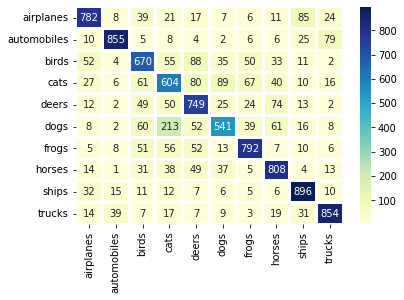

In [25]:
#CIFAR-10 relu
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)
model.summary()


batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_Relu=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs,validation_data=(test_data, test_label))
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 16, 16, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)         0

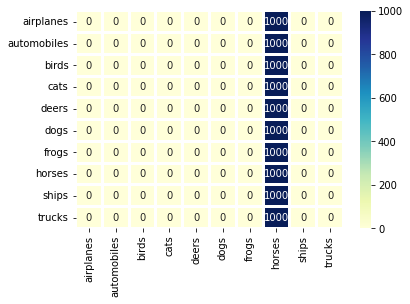

In [26]:
#CIFAR-10 Sigmoid
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation='sigmoid'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation='sigmoid'),
        layers.Dense(1000,activation='sigmoid'),
        layers.Dense(10,activation='softmax'),
    ]
)
model.summary()


batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_Sigmoid=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label))
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 16, 16, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)         0

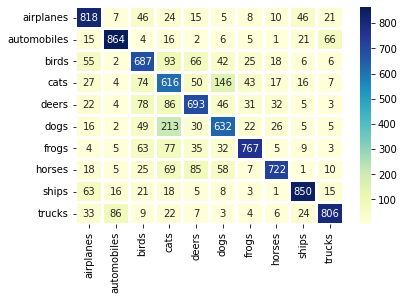

In [27]:
#CIFAR-10 Bistable
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same',activation=custom_activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096,activation=custom_activation),
        layers.Dense(1000,activation=custom_activation),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_Bistable=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label))
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D  (None, 16, 16, 64)        0         
)                                                                
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)         0         
2D)                                                              
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)         0

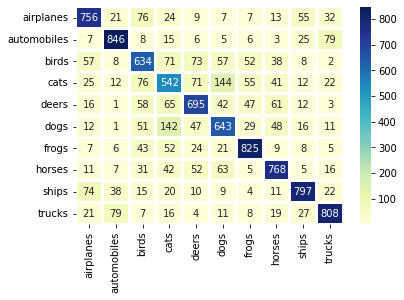

In [28]:
#CIFAR-10 no activation
input_shape=(32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(4096),
        layers.Dense(1000),
        layers.Dense(10,activation='softmax'),
    ]
)

model.summary()

batch_size = 128
epochs = epoch_fix
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CIFAR_No=model.fit(train_data, train_label, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_label))
test_predictions = model.predict(test_data)
cm = confusion_matrix(y_true = np.argmax(test_label,axis=1), y_pred = np.argmax(test_predictions,axis=1))
sns.heatmap(cm,annot=True,fmt='d',linewidths=2,cmap="YlGnBu",xticklabels=label,yticklabels=label)

K.clear_session()

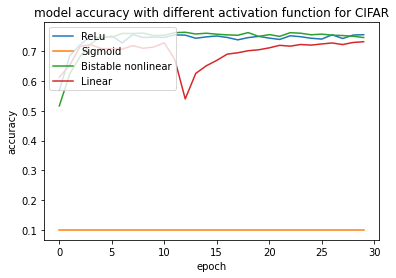

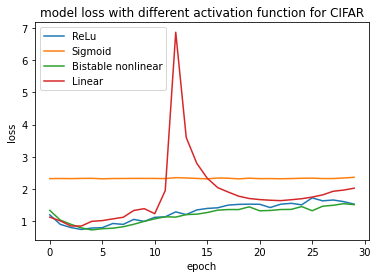

In [29]:
#Plot accuracy vs epochs 
plt.plot(history_CIFAR_Relu.history['val_accuracy'])
plt.plot(history_CIFAR_Sigmoid.history['val_accuracy'])
plt.plot(history_CIFAR_Bistable.history['val_accuracy'])
plt.plot(history_CIFAR_No.history['val_accuracy'])
plt.title('model accuracy with different activation function for CIFAR')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper left')
plt.show()


plt.plot(history_CIFAR_Relu.history['val_loss'])
plt.plot(history_CIFAR_Sigmoid.history['val_loss'])
plt.plot(history_CIFAR_Bistable.history['val_loss'])
plt.plot(history_CIFAR_No.history['val_loss'])
plt.title('model loss with different activation function for CIFAR')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ReLu', 'Sigmoid','Bistable nonlinear','Linear'], loc='upper left')
plt.show()